<a href="https://colab.research.google.com/github/aloiswirth/deep-learning-with-python-notebooks/blob/master/chapter04_getting-started-with-neural-networks.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

This is a companion notebook for the book [Deep Learning with Python, Second Edition](https://www.manning.com/books/deep-learning-with-python-second-edition?a_aid=keras&a_bid=76564dff). For readability, it only contains runnable code blocks and section titles, and omits everything else in the book: text paragraphs, figures, and pseudocode.

**If you want to be able to follow what's going on, I recommend reading the notebook side by side with your copy of the book.**

This notebook was generated for TensorFlow 2.6.

# Getting started with neural networks: Classification and regression

## Classifying movie reviews: A binary classification example

### The IMDB dataset

**Loading the IMDB dataset**

In [1]:
from tensorflow.keras.datasets import imdb
(train_data, train_labels), (test_data, test_labels) = imdb.load_data(
    num_words=10000)

17464789/17464789 [==============================] - 1s 0us/step


In [2]:
max([max(sequence) for sequence in train_data])

9999

**Decoding reviews back to text**

In [3]:
word_index = imdb.get_word_index()
reverse_word_index = dict(
    [(value, key) for (key, value) in word_index.items()])
decoded_review = " ".join(
    [reverse_word_index.get(i - 3, "?") for i in train_data[0]])

1641221/1641221 [==============================] - 0s 0us/step


In [6]:
word_index['nonchalantly']

19478

In [7]:
str(word_index)[:100]

"{'fawn': 34701, 'tsukino': 52006, 'nunnery': 52007, 'sonja': 16816, 'vani': 63951, 'woods': 1408, 's"

In [9]:
reverse_word_index[19478]

'nonchalantly'

In [10]:
decoded_review

"? this film was just brilliant casting location scenery story direction everyone's really suited the part they played and you could just imagine being there robert ? is an amazing actor and now the same being director ? father came from the same scottish island as myself so i loved the fact there was a real connection with this film the witty remarks throughout the film were great it was just brilliant so much that i bought the film as soon as it was released for ? and would recommend it to everyone to watch and the fly fishing was amazing really cried at the end it was so sad and you know what they say if you cry at a film it must have been good and this definitely was also ? to the two little boy's that played the ? of norman and paul they were just brilliant children are often left out of the ? list i think because the stars that play them all grown up are such a big profile for the whole film but these children are amazing and should be praised for what they have done don't you th

### Preparing the data

**Encoding the integer sequences via multi-hot encoding**

In [11]:
import numpy as np
def vectorize_sequences(sequences, dimension=10000):
    results = np.zeros((len(sequences), dimension))
    for i, sequence in enumerate(sequences):
        for j in sequence:
            results[i, j] = 1.
    return results
x_train = vectorize_sequences(train_data)
x_test = vectorize_sequences(test_data)

In [12]:
x_train[0 , :100]

array([0., 1., 1., 0., 1., 1., 1., 1., 1., 1., 0., 0., 1., 1., 1., 1., 1.,
       1., 1., 1., 0., 1., 1., 0., 0., 1., 1., 0., 1., 0., 1., 0., 1., 1.,
       0., 1., 1., 0., 1., 1., 0., 0., 0., 1., 0., 0., 1., 0., 1., 0., 1.,
       1., 1., 0., 0., 0., 1., 0., 0., 0., 0., 0., 1., 0., 0., 1., 1., 0.,
       0., 0., 0., 1., 0., 0., 0., 0., 1., 1., 0., 0., 0., 0., 1., 0., 0.,
       0., 0., 1., 1., 0., 0., 0., 1., 0., 0., 0., 0., 0., 1., 0.])

In [13]:
y_train = np.asarray(train_labels).astype("float32")
y_test = np.asarray(test_labels).astype("float32")

In [14]:
y_train[3]

1.0

### Building your model

**Model definition**

In [15]:
from tensorflow import keras
from tensorflow.keras import layers

model = keras.Sequential([
    layers.Dense(16, activation="relu"),
    layers.Dense(16, activation="relu"),
    layers.Dense(1, activation="sigmoid")
])

**Compiling the model**

In [16]:
model.compile(optimizer="rmsprop",
              loss="binary_crossentropy",
              metrics=["accuracy"])

### Validating your approach

**Setting aside a validation set**

In [17]:
x_val = x_train[:10000]
partial_x_train = x_train[10000:]
y_val = y_train[:10000]
partial_y_train = y_train[10000:]

**Training your model**

In [18]:
history = model.fit(partial_x_train,
                    partial_y_train,
                    epochs=20,
                    batch_size=512,
                    validation_data=(x_val, y_val))

Epoch 1/20
30/30 [==============================] - 3s 75ms/step - loss: 0.5542 - accuracy: 0.7644 - val_loss: 0.4207 - val_accuracy: 0.8642
Epoch 2/20
30/30 [==============================] - 2s 56ms/step - loss: 0.3435 - accuracy: 0.8929 - val_loss: 0.3284 - val_accuracy: 0.8801
Epoch 3/20
30/30 [==============================] - 1s 41ms/step - loss: 0.2530 - accuracy: 0.9168 - val_loss: 0.2881 - val_accuracy: 0.8866
Epoch 4/20
30/30 [==============================] - 1s 36ms/step - loss: 0.2058 - accuracy: 0.9308 - val_loss: 0.2832 - val_accuracy: 0.8863
Epoch 5/20
30/30 [==============================] - 1s 38ms/step - loss: 0.1729 - accuracy: 0.9432 - val_loss: 0.2887 - val_accuracy: 0.8837
Epoch 6/20
30/30 [==============================] - 1s 35ms/step - loss: 0.1473 - accuracy: 0.9525 - val_loss: 0.2993 - val_accuracy: 0.8811
Epoch 7/20
30/30 [==============================] - 1s 38ms/step - loss: 0.1281 - accuracy: 0.9589 - val_loss: 0.2930 - val_accuracy: 0.8835
Epoch 8/20
30

In [19]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 16)                160016    
                                                                 
 dense_1 (Dense)             (None, 16)                272       
                                                                 
 dense_2 (Dense)             (None, 1)                 17        
                                                                 
Total params: 160,305
Trainable params: 160,305
Non-trainable params: 0
_________________________________________________________________


In [20]:
model.input

<KerasTensor: shape=(None, 10000) dtype=float32 (created by layer 'dense_input')>

In [21]:
history_dict = history.history
history_dict.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

In [22]:
history_dict

{'loss': [0.5541720986366272,
  0.3435342013835907,
  0.2530154287815094,
  0.20577269792556763,
  0.17289714515209198,
  0.14733830094337463,
  0.12807177007198334,
  0.11115769296884537,
  0.0933932214975357,
  0.08383360505104065,
  0.07292681932449341,
  0.06099295988678932,
  0.054980624467134476,
  0.04644523561000824,
  0.0439581535756588,
  0.032813236117362976,
  0.030348366126418114,
  0.027274349704384804,
  0.021306592971086502,
  0.019296808168292046],
 'accuracy': [0.7644000053405762,
  0.8928666710853577,
  0.9168000221252441,
  0.9308000206947327,
  0.9431999921798706,
  0.9525333046913147,
  0.9589333534240723,
  0.9655333161354065,
  0.9735999703407288,
  0.9764000177383423,
  0.9805333614349365,
  0.9860666394233704,
  0.9868666529655457,
  0.9899333119392395,
  0.9895333051681519,
  0.9941333532333374,
  0.9940666556358337,
  0.995199978351593,
  0.996999979019165,
  0.9971333146095276],
 'val_loss': [0.42073071002960205,
  0.32840651273727417,
  0.2881409823894501,

**Plotting the training and validation loss**

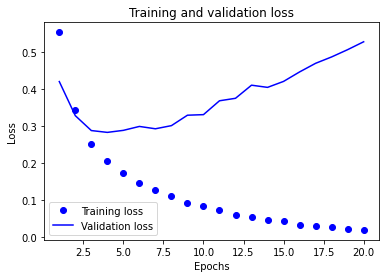

In [23]:
import matplotlib.pyplot as plt
history_dict = history.history
loss_values = history_dict["loss"]
val_loss_values = history_dict["val_loss"]
epochs = range(1, len(loss_values) + 1)
plt.plot(epochs, loss_values, "bo", label="Training loss")
plt.plot(epochs, val_loss_values, "b", label="Validation loss")
plt.title("Training and validation loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()
plt.show()

**Plotting the training and validation accuracy**

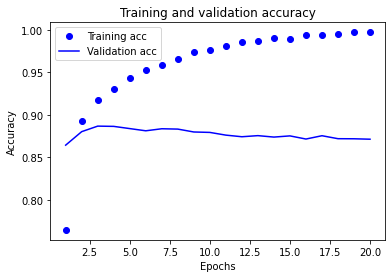

In [25]:
plt.clf()
acc = history_dict["accuracy"]
val_acc = history_dict["val_accuracy"]
plt.plot(epochs, acc, "bo", label="Training acc")
plt.plot(epochs, val_acc, "b", label="Validation acc")
plt.title("Training and validation accuracy")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

**Retraining a model from scratch**

In [26]:
model = keras.Sequential([
    layers.Dense(16, activation="relu"),
    layers.Dense(16, activation="relu"),
    layers.Dense(1, activation="sigmoid")
])
model.compile(optimizer="rmsprop",
              loss="binary_crossentropy",
              metrics=["accuracy"])
model.fit(x_train, y_train, epochs=4, batch_size=512)
results = model.evaluate(x_test, y_test)

Epoch 1/4
49/49 [==============================] - 3s 34ms/step - loss: 0.5089 - accuracy: 0.7956
Epoch 2/4
49/49 [==============================] - 1s 28ms/step - loss: 0.3007 - accuracy: 0.9013
Epoch 3/4
49/49 [==============================] - 1s 28ms/step - loss: 0.2307 - accuracy: 0.9202
Epoch 4/4
782/782 [==============================] - 4s 5ms/step - loss: 0.2796 - accuracy: 0.8872


In [27]:
results

[0.27960994839668274, 0.8871600031852722]

### Using a trained model to generate predictions on new data

In [28]:
model.predict(x_test)

782/782 [==============================] - 2s 3ms/step


array([[0.2602402 ],
       [0.99901134],
       [0.8694146 ],
       ...,
       [0.11438363],
       [0.09255385],
       [0.5981405 ]], dtype=float32)

### Further experiments

### Wrapping up

## Classifying newswires: A multiclass classification example

### The Reuters dataset

**Loading the Reuters dataset**

In [29]:
from tensorflow.keras.datasets import reuters
(train_data, train_labels), (test_data, test_labels) = reuters.load_data(
    num_words=10000)

2110848/2110848 [==============================] - 1s 0us/step


In [30]:
len(train_data)

8982

In [32]:
len(test_data)

2246

In [31]:
train_data[10]

[1,
 245,
 273,
 207,
 156,
 53,
 74,
 160,
 26,
 14,
 46,
 296,
 26,
 39,
 74,
 2979,
 3554,
 14,
 46,
 4689,
 4329,
 86,
 61,
 3499,
 4795,
 14,
 61,
 451,
 4329,
 17,
 12]

**Decoding newswires back to text**

In [33]:
word_index = reuters.get_word_index()
reverse_word_index = dict([(value, key) for (key, value) in word_index.items()])
decoded_newswire = " ".join([reverse_word_index.get(i - 3, "?") for i in
    train_data[0]])

550378/550378 [==============================] - 0s 0us/step


In [36]:
decoded_newswire

'? ? ? said as a result of its december acquisition of space co it expects earnings per share in 1987 of 1 15 to 1 30 dlrs per share up from 70 cts in 1986 the company said pretax net should rise to nine to 10 mln dlrs from six mln dlrs in 1986 and rental operation revenues to 19 to 22 mln dlrs from 12 5 mln dlrs it said cash flow per share this year should be 2 50 to three dlrs reuter 3'

### Preparing the data

**Encoding the input data**

In [37]:
x_train = vectorize_sequences(train_data)
x_test = vectorize_sequences(test_data)

**Encoding the labels**

In [39]:
def to_one_hot(labels, dimension=46):
    results = np.zeros((len(labels), dimension))
    for i, label in enumerate(labels):
        results[i, label] = 1.
    return results
y_train = to_one_hot(train_labels)
y_test = to_one_hot(test_labels)

In [40]:
from tensorflow.keras.utils import to_categorical
y_train = to_categorical(train_labels)
y_test = to_categorical(test_labels)

### Building your model

**Model definition**

In [41]:
model = keras.Sequential([
    layers.Dense(64, activation="relu"),
    layers.Dense(64, activation="relu"),
    layers.Dense(46, activation="softmax")
])

**Compiling the model**

In [42]:
model.compile(optimizer="rmsprop",
              loss="categorical_crossentropy",
              metrics=["accuracy"])

### Validating your approach

**Setting aside a validation set**

In [43]:
x_val = x_train[:1000]
partial_x_train = x_train[1000:]
y_val = y_train[:1000]
partial_y_train = y_train[1000:]

**Training the model**

In [44]:
history = model.fit(partial_x_train,
                    partial_y_train,
                    epochs=20,
                    batch_size=512,
                    validation_data=(x_val, y_val))

Epoch 1/20
16/16 [==============================] - 2s 91ms/step - loss: 2.7422 - accuracy: 0.5013 - val_loss: 1.8369 - val_accuracy: 0.6250
Epoch 2/20
16/16 [==============================] - 2s 98ms/step - loss: 1.5617 - accuracy: 0.6731 - val_loss: 1.3878 - val_accuracy: 0.6790
Epoch 3/20
16/16 [==============================] - 1s 74ms/step - loss: 1.2051 - accuracy: 0.7394 - val_loss: 1.2021 - val_accuracy: 0.7340
Epoch 4/20
16/16 [==============================] - 1s 54ms/step - loss: 0.9911 - accuracy: 0.7854 - val_loss: 1.0996 - val_accuracy: 0.7540
Epoch 5/20
16/16 [==============================] - 1s 51ms/step - loss: 0.8254 - accuracy: 0.8166 - val_loss: 1.0141 - val_accuracy: 0.7760
Epoch 6/20
16/16 [==============================] - 1s 51ms/step - loss: 0.6870 - accuracy: 0.8500 - val_loss: 0.9524 - val_accuracy: 0.7990
Epoch 7/20
16/16 [==============================] - 1s 51ms/step - loss: 0.5732 - accuracy: 0.8782 - val_loss: 0.9666 - val_accuracy: 0.7870
Epoch 8/20
16

**Plotting the training and validation loss**

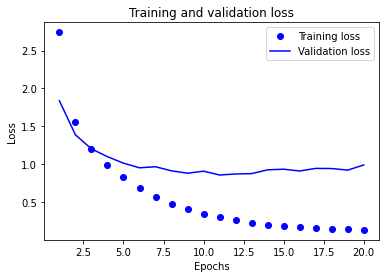

In [45]:
loss = history.history["loss"]
val_loss = history.history["val_loss"]
epochs = range(1, len(loss) + 1)
plt.plot(epochs, loss, "bo", label="Training loss")
plt.plot(epochs, val_loss, "b", label="Validation loss")
plt.title("Training and validation loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()
plt.show()

**Plotting the training and validation accuracy**

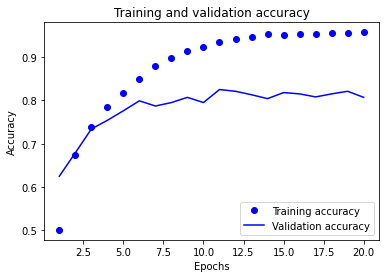

In [46]:
plt.clf()
acc = history.history["accuracy"]
val_acc = history.history["val_accuracy"]
plt.plot(epochs, acc, "bo", label="Training accuracy")
plt.plot(epochs, val_acc, "b", label="Validation accuracy")
plt.title("Training and validation accuracy")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

**Retraining a model from scratch**

In [47]:
model = keras.Sequential([
  layers.Dense(64, activation="relu"),
  layers.Dense(64, activation="relu"),
  layers.Dense(46, activation="softmax")
])
model.compile(optimizer="rmsprop",
              loss="categorical_crossentropy",
              metrics=["accuracy"])
model.fit(x_train,
          y_train,
          epochs=9,
          batch_size=512)
results = model.evaluate(x_test, y_test)

Epoch 1/9
18/18 [==============================] - 2s 59ms/step - loss: 2.7671 - accuracy: 0.4783
Epoch 2/9
18/18 [==============================] - 1s 48ms/step - loss: 1.5223 - accuracy: 0.6890
Epoch 3/9
18/18 [==============================] - 1s 46ms/step - loss: 1.1357 - accuracy: 0.7509
Epoch 4/9
18/18 [==============================] - 1s 45ms/step - loss: 0.9167 - accuracy: 0.8019
Epoch 5/9
18/18 [==============================] - 1s 45ms/step - loss: 0.7597 - accuracy: 0.8363
Epoch 6/9
18/18 [==============================] - 1s 47ms/step - loss: 0.6318 - accuracy: 0.8682
Epoch 7/9
18/18 [==============================] - 1s 47ms/step - loss: 0.5247 - accuracy: 0.8914
Epoch 8/9
18/18 [==============================] - 1s 47ms/step - loss: 0.4438 - accuracy: 0.9076
Epoch 9/9
71/71 [==============================] - 0s 4ms/step - loss: 0.9290 - accuracy: 0.7872


In [48]:
results

[0.9289923906326294, 0.7871772050857544]

In [49]:
import copy
test_labels_copy = copy.copy(test_labels)
np.random.shuffle(test_labels_copy)
hits_array = np.array(test_labels) == np.array(test_labels_copy)
hits_array.mean()

0.18388245770258238

### Generating predictions on new data

In [50]:
predictions = model.predict(x_test)

71/71 [==============================] - 0s 3ms/step


In [54]:
predictions[0]

array([1.1834675e-04, 1.9726141e-04, 1.6701284e-04, 5.8363497e-01,
       4.0079987e-01, 9.8345354e-06, 7.6509561e-05, 2.6664851e-05,
       2.8320316e-03, 5.7510621e-05, 2.1515945e-05, 5.2599679e-04,
       4.1732113e-05, 6.8794354e-04, 1.4435242e-04, 1.1358719e-04,
       1.0823604e-03, 3.3716744e-04, 7.1653580e-05, 2.5773183e-03,
       2.4693480e-03, 5.5694580e-04, 7.8736295e-05, 4.2855748e-04,
       1.6784817e-05, 4.5286564e-04, 6.7485048e-06, 1.9319546e-04,
       4.6580096e-04, 2.3195310e-04, 6.1993347e-04, 1.4573011e-04,
       3.7589343e-05, 2.4181665e-05, 5.0555416e-05, 2.2932674e-05,
       3.9066868e-05, 1.1400577e-04, 9.5200441e-05, 1.1393338e-04,
       1.2594479e-05, 1.2092862e-04, 5.3007196e-05, 1.1283145e-04,
       6.6096759e-06, 6.1874512e-06], dtype=float32)

In [52]:
np.sum(predictions[0])

0.99999994

In [53]:
np.argmax(predictions[0])

3

### A different way to handle the labels and the loss

In [55]:
y_train = np.array(train_labels)
y_test = np.array(test_labels)

In [56]:
model.compile(optimizer="rmsprop",
              loss="sparse_categorical_crossentropy",
              metrics=["accuracy"])

### The importance of having sufficiently large intermediate layers

**A model with an information bottleneck**

In [57]:
model = keras.Sequential([
    layers.Dense(64, activation="relu"),
    layers.Dense(4, activation="relu"),
    layers.Dense(46, activation="softmax")
])
model.compile(optimizer="rmsprop",
              loss="categorical_crossentropy",
              metrics=["accuracy"])
model.fit(partial_x_train,
          partial_y_train,
          epochs=20,
          batch_size=128,
          validation_data=(x_val, y_val))

Epoch 1/20
63/63 [==============================] - 2s 23ms/step - loss: 3.5439 - accuracy: 0.1461 - val_loss: 3.2711 - val_accuracy: 0.0990
Epoch 2/20
63/63 [==============================] - 2s 31ms/step - loss: 2.8491 - accuracy: 0.2298 - val_loss: 2.5335 - val_accuracy: 0.2920
Epoch 3/20
63/63 [==============================] - 1s 23ms/step - loss: 2.1022 - accuracy: 0.3281 - val_loss: 1.8280 - val_accuracy: 0.5990
Epoch 4/20
63/63 [==============================] - 1s 19ms/step - loss: 1.4910 - accuracy: 0.6517 - val_loss: 1.4898 - val_accuracy: 0.6420
Epoch 5/20
63/63 [==============================] - 1s 18ms/step - loss: 1.2548 - accuracy: 0.6867 - val_loss: 1.3906 - val_accuracy: 0.6810
Epoch 6/20
63/63 [==============================] - 1s 18ms/step - loss: 1.1300 - accuracy: 0.7189 - val_loss: 1.3507 - val_accuracy: 0.6960
Epoch 7/20
63/63 [==============================] - 1s 18ms/step - loss: 1.0356 - accuracy: 0.7368 - val_loss: 1.3164 - val_accuracy: 0.7020
Epoch 8/20
63

### Further experiments

### Wrapping up

## Predicting house prices: A regression example

### The Boston Housing Price dataset

**Loading the Boston housing dataset**

In [70]:
from tensorflow.keras.datasets import boston_housing
(train_data, train_targets), (test_data, test_targets) = boston_housing.load_data()

In [71]:
train_data.shape

(404, 13)

In [72]:
test_data.shape

(102, 13)

In [73]:
train_targets

array([15.2, 42.3, 50. , 21.1, 17.7, 18.5, 11.3, 15.6, 15.6, 14.4, 12.1,
       17.9, 23.1, 19.9, 15.7,  8.8, 50. , 22.5, 24.1, 27.5, 10.9, 30.8,
       32.9, 24. , 18.5, 13.3, 22.9, 34.7, 16.6, 17.5, 22.3, 16.1, 14.9,
       23.1, 34.9, 25. , 13.9, 13.1, 20.4, 20. , 15.2, 24.7, 22.2, 16.7,
       12.7, 15.6, 18.4, 21. , 30.1, 15.1, 18.7,  9.6, 31.5, 24.8, 19.1,
       22. , 14.5, 11. , 32. , 29.4, 20.3, 24.4, 14.6, 19.5, 14.1, 14.3,
       15.6, 10.5,  6.3, 19.3, 19.3, 13.4, 36.4, 17.8, 13.5, 16.5,  8.3,
       14.3, 16. , 13.4, 28.6, 43.5, 20.2, 22. , 23. , 20.7, 12.5, 48.5,
       14.6, 13.4, 23.7, 50. , 21.7, 39.8, 38.7, 22.2, 34.9, 22.5, 31.1,
       28.7, 46. , 41.7, 21. , 26.6, 15. , 24.4, 13.3, 21.2, 11.7, 21.7,
       19.4, 50. , 22.8, 19.7, 24.7, 36.2, 14.2, 18.9, 18.3, 20.6, 24.6,
       18.2,  8.7, 44. , 10.4, 13.2, 21.2, 37. , 30.7, 22.9, 20. , 19.3,
       31.7, 32. , 23.1, 18.8, 10.9, 50. , 19.6,  5. , 14.4, 19.8, 13.8,
       19.6, 23.9, 24.5, 25. , 19.9, 17.2, 24.6, 13

### Preparing the data

**Normalizing the data**

In [74]:
mean = train_data.mean(axis=0)
train_data -= mean
std = train_data.std(axis=0)
train_data /= std

In [78]:
test_data -= mean
test_data /= std

In [66]:
mean

array([3.74511057e+00, 1.14801980e+01, 1.11044307e+01, 6.18811881e-02,
       5.57355941e-01, 6.26708168e+00, 6.90106436e+01, 3.74027079e+00,
       9.44059406e+00, 4.05898515e+02, 1.84759901e+01, 3.54783168e+02,
       1.27408168e+01])

### Building your model

**Model definition**

In [80]:
def build_model():
    model = keras.Sequential([
        layers.Dense(64, activation="relu"),
        layers.Dense(64, activation="relu"),
        layers.Dense(1)
    ])
    model.compile(optimizer="rmsprop", loss="mse", metrics=["mae"])
    return model

### Validating your approach using K-fold validation

**K-fold validation**

In [81]:
k = 4
num_val_samples = len(train_data) // k
num_epochs = 100
all_scores = []
for i in range(k):
    print(f"Processing fold #{i}")
    val_data = train_data[i * num_val_samples: (i + 1) * num_val_samples]
    val_targets = train_targets[i * num_val_samples: (i + 1) * num_val_samples]
    partial_train_data = np.concatenate(
        [train_data[:i * num_val_samples],
         train_data[(i + 1) * num_val_samples:]],
        axis=0)
    partial_train_targets = np.concatenate(
        [train_targets[:i * num_val_samples],
         train_targets[(i + 1) * num_val_samples:]],
        axis=0)
    model = build_model()
    model.fit(partial_train_data, partial_train_targets,
              epochs=num_epochs, batch_size=16, verbose=0)
    val_mse, val_mae = model.evaluate(val_data, val_targets, verbose=0)
    all_scores.append(val_mae)

Processing fold #0
Processing fold #1
Processing fold #2
Processing fold #3


In [82]:
all_scores

[1.9840936660766602,
 2.4371256828308105,
 2.3981478214263916,
 2.4324934482574463]

In [83]:
np.mean(all_scores)

2.312965154647827

**Saving the validation logs at each fold**

In [85]:
num_epochs = 500
all_mae_histories = []
for i in range(k):
    print(f"Processing fold #{i}")
    val_data = train_data[i * num_val_samples: (i + 1) * num_val_samples]
    val_targets = train_targets[i * num_val_samples: (i + 1) * num_val_samples]
    partial_train_data = np.concatenate(
        [train_data[:i * num_val_samples],
         train_data[(i + 1) * num_val_samples:]],
        axis=0)
    partial_train_targets = np.concatenate(
        [train_targets[:i * num_val_samples],
         train_targets[(i + 1) * num_val_samples:]],
        axis=0)
    model = build_model()
    history = model.fit(partial_train_data, partial_train_targets,
                        validation_data=(val_data, val_targets),
                        epochs=num_epochs, batch_size=16, verbose=0)
    mae_history = history.history["val_mae"]
    all_mae_histories.append(mae_history)

Processing fold #0
Processing fold #1
Processing fold #2
Processing fold #3


**Building the history of successive mean K-fold validation scores**

In [86]:
average_mae_history = [
    np.mean([x[i] for x in all_mae_histories]) for i in range(num_epochs)]

**Plotting validation scores**

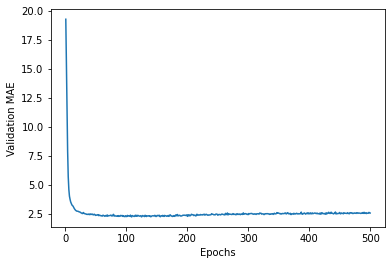

In [87]:
plt.plot(range(1, len(average_mae_history) + 1), average_mae_history)
plt.xlabel("Epochs")
plt.ylabel("Validation MAE")
plt.show()

**Plotting validation scores, excluding the first 10 data points**

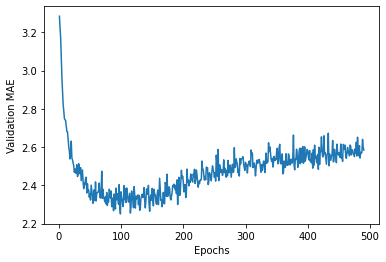

In [88]:
truncated_mae_history = average_mae_history[10:]
plt.plot(range(1, len(truncated_mae_history) + 1), truncated_mae_history)
plt.xlabel("Epochs")
plt.ylabel("Validation MAE")
plt.show()

**Training the final model**

In [89]:
model = build_model()
model.fit(train_data, train_targets,
          epochs=130, batch_size=16, verbose=0)
test_mse_score, test_mae_score = model.evaluate(test_data, test_targets)

4/4 [==============================] - 0s 4ms/step - loss: 7124.7808 - mae: 77.6970


In [90]:
test_mae_score

77.69696044921875

### Generating predictions on new data

In [91]:
predictions = model.predict(test_data)
predictions[0]

4/4 [==============================] - 0s 3ms/step


array([49.766644], dtype=float32)

In [94]:
test_targets[0]

7.2

### Wrapping up

## Summary